# Analyzing attendance data from the mentorship program

## Objective:

Your analysis should explore how variables like **grade level, family status, family support level, and graduation obstacles** impact **student attendance** at these tutoring sessions.

## Requirements:

- **Charts and Visualizations**: Create charts to visually represent your analysis. These visualizations should clearly support your findings and insights.

- **Written Analysis**: Provide a narrative that explains your analytical process, findings, and any assumptions made. Discuss the implications of your findings and suggest actionable recommendations, if applicable.

- **Code Documentation**: If you use code (e.g., in Google Colab or Python scripts) to analyze the data and generate charts, include this code with your report. This documentation will demonstrate your analytical approach and technical skills.

## 1. Import libraries, exploratory data analysis and data cleaning and transformation

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as ss

In [2]:
path = "Study Case --- Tianyi Ma.xlsx"

df = pd.read_excel(path)
df.head()

,computer_reservation_id,session_time,library_id,student_attended,mentor_attended,student_id,student_gender,grade_level,family_status,family_support_level,graduation_obstacle
0,195,2022-08-18,2,False,True,46.0,Male,10.0,Staying with both parents,2.0,Financial
1,908,2022-08-18,2,False,True,49.0,Female,9.0,Staying with both parents,1.0,Financial
2,51,2022-08-25,2,True,True,45.0,Female,10.0,Staying with both parents,2.0,Financial
3,10839,2022-09-15,3,False,True,177.0,Male,4.0,Staying with an extended family member,3.0,Financial
4,198,2022-09-08,2,True,True,46.0,Male,10.0,Staying with both parents,2.0,Financial


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   computer_reservation_id  8736 non-null   int64         
 1   session_time             8736 non-null   datetime64[ns]
 2   library_id               8736 non-null   int64         
 3   student_attended         8736 non-null   bool          
 4   mentor_attended          8736 non-null   bool          
 5   student_id               8192 non-null   float64       
 6   student_gender           8015 non-null   object        
 7   grade_level              8161 non-null   float64       
 8   family_status            8126 non-null   object        
 9   family_support_level     8161 non-null   float64       
 10  graduation_obstacle      5642 non-null   object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 631.4+ KB


In [4]:
len(df.student_id.unique())

563

Students have various number of sessions:

In [5]:
group_by_student_id = df.groupby(['student_id'])
numsession_by_student_id = []

for group in group_by_student_id:
    numsession_by_student_id.append(len(group[1].session_time.unique()))

len(set(numsession_by_student_id))

58

If we check what family status a student has, they are indeed only associated with one status, as expected

In [30]:
for idx, group in enumerate(group_by_student_id):
    if idx > 0: break
    print(len(group[1].family_status.unique()))

1


Look into categorical data

In [6]:
col_names = ["family_status", "graduation_obstacle", "grade_level", "family_support_level"]

for col in col_names:
    print(col, df[col].unique())

family_status ['Staying with both parents' 'Staying with an extended family member'
 'Single parent' 'Other' nan]
graduation_obstacle ['Financial' nan 'Peer Influence' 'Family' 'Required to work' 'Health'
 'Other' 'Parenting/Pregnant']
grade_level [10.  9.  4. 12.  1.  8.  5.  3.  7. nan  2.  6. 11.  0.]
family_support_level [ 2.  1.  3. nan  4.  0.]


Plotting the category distribution to gain more insights

In [8]:
cat_cols = ["family_status", "graduation_obstacle"]
num_cols = ["grade_level", "family_support_level"]

for col in num_cols:
    df[col] = df[col].fillna('UNKNOWN')
    df[f'{col}_cat'] = df[col].astype(str)

df.head()

,computer_reservation_id,session_time,library_id,student_attended,mentor_attended,student_id,student_gender,grade_level,family_status,family_support_level,graduation_obstacle,grade_level_cat,family_support_level_cat
0,195,2022-08-18,2,False,True,46.0,Male,10.0,Staying with both parents,2.0,Financial,10.0,2.0
1,908,2022-08-18,2,False,True,49.0,Female,9.0,Staying with both parents,1.0,Financial,9.0,1.0
2,51,2022-08-25,2,True,True,45.0,Female,10.0,Staying with both parents,2.0,Financial,10.0,2.0
3,10839,2022-09-15,3,False,True,177.0,Male,4.0,Staying with an extended family member,3.0,Financial,4.0,3.0
4,198,2022-09-08,2,True,True,46.0,Male,10.0,Staying with both parents,2.0,Financial,10.0,2.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   computer_reservation_id   8736 non-null   int64         
 1   session_time              8736 non-null   datetime64[ns]
 2   library_id                8736 non-null   int64         
 3   student_attended          8736 non-null   bool          
 4   mentor_attended           8736 non-null   bool          
 5   student_id                8192 non-null   float64       
 6   student_gender            8015 non-null   object        
 7   grade_level               8736 non-null   object        
 8   family_status             8126 non-null   object        
 9   family_support_level      8736 non-null   object        
 10  graduation_obstacle       5642 non-null   object        
 11  grade_level_cat           8736 non-null   object        
 12  family_support_level

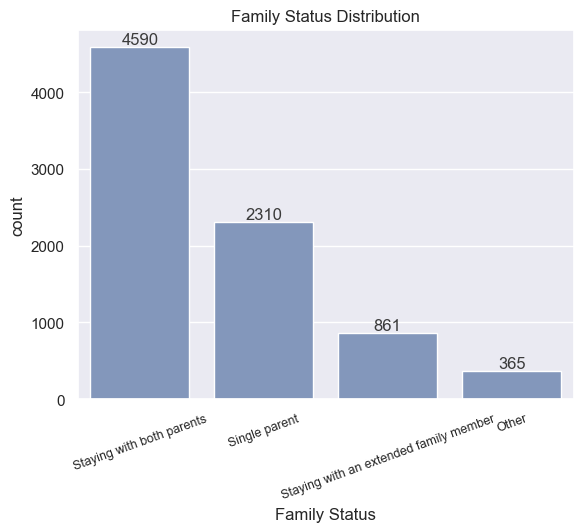

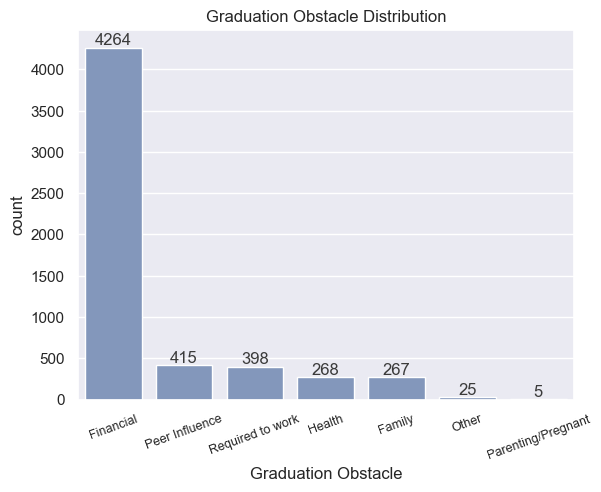

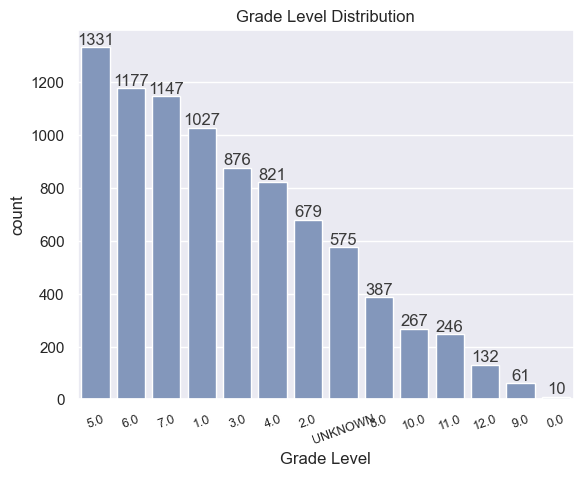

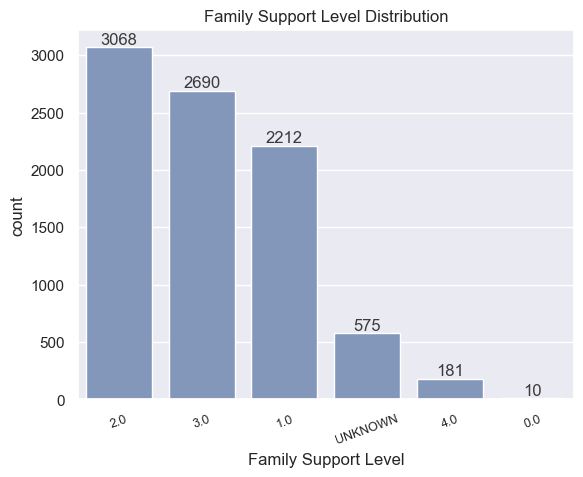

In [105]:
cols = ["family_status", "graduation_obstacle", 'grade_level_cat', 'family_support_level_cat']
titles = ["Family Status", "Graduation Obstacle", 'Grade Level', 'Family Support Level']

for col, title in zip(cols, titles):
    sns.set_theme(style="darkgrid")
    plt.figure()
    plt.xticks(rotation=20, fontsize=9)
    order = df[col].value_counts(ascending=False).index
    label_values = df[col].value_counts(ascending=False)
    ax = sns.countplot(df, x=col, color="#7A95C4", order=order)
    ax.set_title(f"{title} Distribution")
    ax.set_xlabel(title)
    ax.bar_label(container=ax.containers[0], labels=label_values, color="#3b3b3b")
    ax.figure.savefig(f"{title} Distribution.png")

## 2. Visualizing the correlation between the categorical predictors and the target variable

Check indeed there is no null values for `student_attended` column

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   computer_reservation_id   8736 non-null   int64         
 1   session_time              8736 non-null   datetime64[ns]
 2   library_id                8736 non-null   int64         
 3   student_attended          8736 non-null   bool          
 4   mentor_attended           8736 non-null   bool          
 5   student_id                8192 non-null   float64       
 6   student_gender            8015 non-null   object        
 7   grade_level               8736 non-null   object        
 8   family_status             8126 non-null   object        
 9   family_support_level      8736 non-null   object        
 10  graduation_obstacle       5642 non-null   object        
 11  grade_level_cat           8736 non-null   object        
 12  family_support_level

In [56]:
df_attended = df[df.student_attended & df.mentor_attended]
df_not_attended = df[(~df.student_attended) & df.mentor_attended]

In [57]:
df_attended.shape, df_not_attended.shape

((5004, 13), (1097, 13))

In [58]:
df_valid = df[df.mentor_attended]
df_valid.shape

(6101, 13)

In [59]:
df_attended.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5004 entries, 2 to 8735
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   computer_reservation_id   5004 non-null   int64         
 1   session_time              5004 non-null   datetime64[ns]
 2   library_id                5004 non-null   int64         
 3   student_attended          5004 non-null   bool          
 4   mentor_attended           5004 non-null   bool          
 5   student_id                4633 non-null   float64       
 6   student_gender            4525 non-null   object        
 7   grade_level               5004 non-null   object        
 8   family_status             4623 non-null   object        
 9   family_support_level      5004 non-null   object        
 10  graduation_obstacle       2995 non-null   object        
 11  grade_level_cat           5004 non-null   object        
 12  family_support_level_cat 

### Resampling & visualize general variable distribution

In the following visualization, I count only non-null `family_status` and `graduation_obstacle` values and ignore the rest. Also notice that the target classes are imbalanced, which means we should oversample to rebalance the dataset.

Random over-sampling:
student_attended
False    5004
True     5004
Name: count, dtype: int64


<Axes: title={'center': 'Count (target)'}, xlabel='student_attended'>

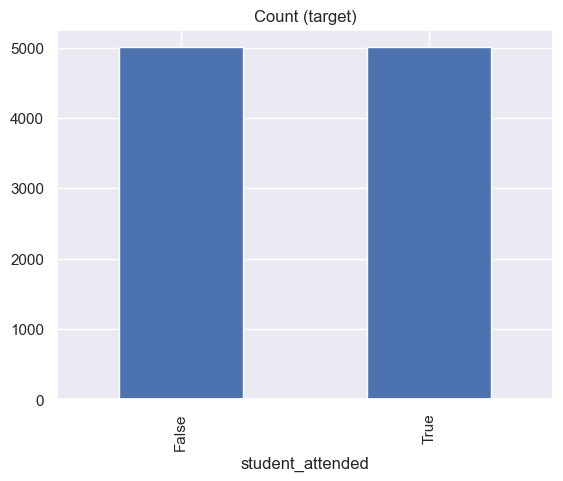

In [61]:
count_attended = df_attended.shape[0]
df_not_attended_over = df_not_attended.sample(count_attended, replace=True)
df_balanced = pd.concat([df_not_attended_over, df_attended], axis=0)

print('Random over-sampling:')
print(df_balanced.student_attended.value_counts())

df_balanced.student_attended.value_counts().plot(kind='bar', title='Count (target)')

In [70]:
df_balanced = df_balanced.reset_index()
df_balanced.head()

,index,computer_reservation_id,session_time,library_id,student_attended,mentor_attended,student_id,student_gender,grade_level,family_status,family_support_level,graduation_obstacle,grade_level_cat,family_support_level_cat
0,5638,14836,2022-12-12,9,False,True,304.0,Male,2.0,Single parent,3.0,Financial,2.0,3.0
1,7978,78906,2024-03-09,8,False,True,468.0,Male,3.0,Staying with an extended family member,4.0,Financial,3.0,4.0
2,7068,65590,2023-10-25,9,False,True,2213.0,Male,2.0,Staying with both parents,3.0,Financial,2.0,3.0
3,517,36663,2023-01-07,15,False,True,1263.0,Female,11.0,Staying with both parents,1.0,NaN,11.0,1.0
4,2122,11462,2022-10-15,8,False,True,351.0,Female,5.0,Staying with both parents,3.0,Financial,5.0,3.0


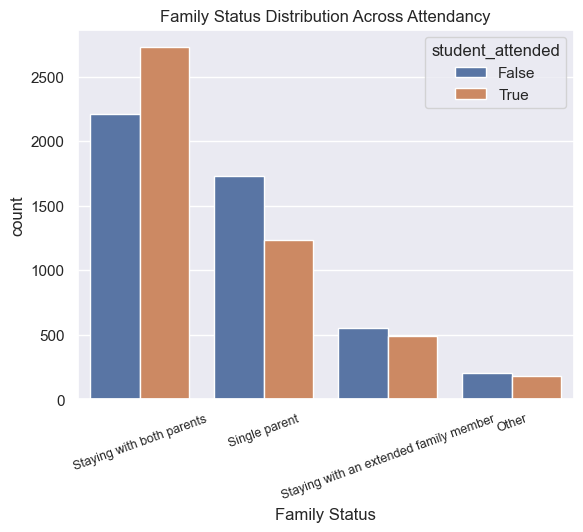

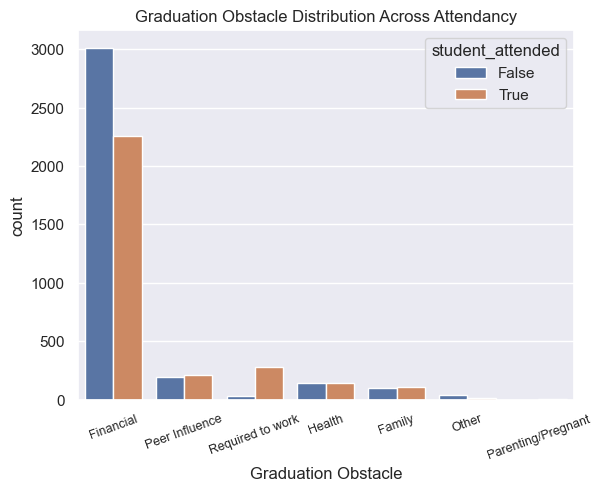

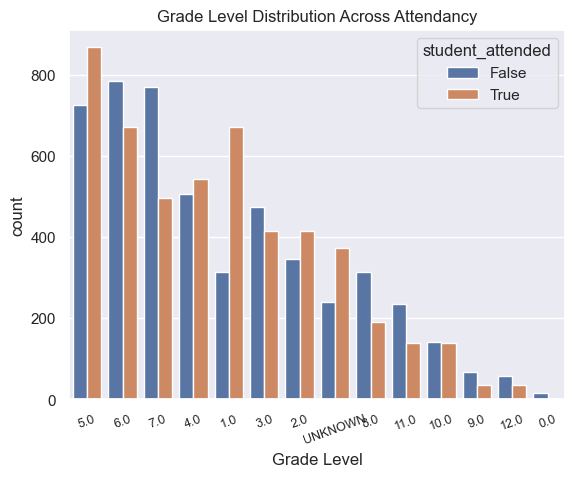

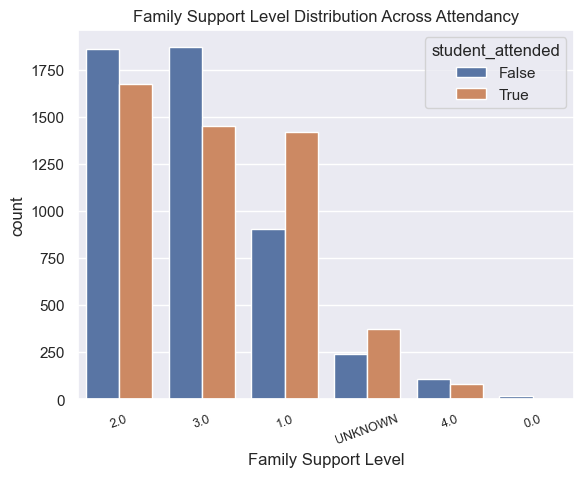

In [104]:
for col, title in zip(cols, titles):
    sns.set_theme(style="darkgrid")
    plt.figure()
    plt.xticks(rotation=20, fontsize=9)
    data = df_balanced[[col, "student_attended"]]
    order = df_balanced[col].value_counts(ascending=False).index
    label_values = df_balanced[col].value_counts(ascending=False)
    ax = sns.countplot(data, x=col, hue="student_attended", order=order)
    ax.set_title(f"{title} Distribution Across Attendancy")
    ax.set_xlabel(title)

## 3. Statistical Tests

### 3.1 Chi-square test to find out if the categorical variable and the target variable is correlated through comparing p-value

This statistical test tries to prove the null hypothesis that: the two variables are NOT correlated with each other. If the resulting p-value of the test is less tha 0.05, then that means the null hypothesis is likely to be false and the two variables are likely correlated.

First I calculate the confusion matrix and then use that for the test.

In [75]:
correlated_cols = []
for col in cols:
    print(f"Categorical Variable: {col}")
    confusion_matrix = pd.crosstab(index=df_balanced[col],columns=df_balanced['student_attended'])
    print("Confusion Matrix")
    print(confusion_matrix)
    
    p_val = chi2_contingency(confusion_matrix)[1]
    print(f"p-value: {p_val}\n{col} correlates with if student attend: {p_val<=0.05}\n")
    if p_val<=0.05:
        correlated_cols.append(col)

print(f"Correlated cols: {correlated_cols}")

Categorical Variable: family_status
Confusion Matrix
student_attended                        False  True 
family_status                                       
Other                                     203    178
Single parent                            1730   1231
Staying with an extended family member    550    486
Staying with both parents                2208   2728
p-value: 5.238479346175517e-31
family_status correlates with if student attend: True

Categorical Variable: graduation_obstacle
Confusion Matrix
student_attended     False  True 
graduation_obstacle              
Family                  99    105
Financial             3015   2255
Health                 143    139
Other                   37     11
Parenting/Pregnant       0      4
Peer Influence         196    206
Required to work        29    275
p-value: 5.138213130168986e-59
graduation_obstacle correlates with if student attend: True

Categorical Variable: grade_level_cat
Confusion Matrix
student_attended  False  True 


### 3.2 Cramer's V to quantify correlation

In the next section, we take a step further to quantify the correlation through a test called Cramer's V. We use a version suggested by Wikipedia and implemented in this post: https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix

In [77]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [79]:
col_corr = []
for col in cols:
    print(f"Categorical Variable: {col}")
    confusion_matrix = pd.crosstab(index=df_balanced[col],columns=df_balanced['student_attended']).to_numpy()
    print("Confusion Matrix")
    print(confusion_matrix)
    
    corr = cramers_corrected_stat(confusion_matrix)
    print(f"{col}'s correlation with student_attended: {corr}\n")
    col_corr.append({"var":col, "corr":corr})

print(f"Correlations: {col_corr}")

Categorical Variable: family_status
Confusion Matrix
[[ 203  178]
 [1730 1231]
 [ 550  486]
 [2208 2728]]
family_status's correlation with student_attended: 0.12303637908475062

Categorical Variable: graduation_obstacle
Confusion Matrix
[[  99  105]
 [3015 2255]
 [ 143  139]
 [  37   11]
 [   0    4]
 [ 196  206]
 [  29  275]]
graduation_obstacle's correlation with student_attended: 0.207689124377543

Categorical Variable: grade_level_cat
Confusion Matrix
[[ 16   0]
 [315 672]
 [141 139]
 [236 139]
 [ 58  35]
 [346 417]
 [476 417]
 [508 544]
 [727 869]
 [786 673]
 [772 498]
 [314 191]
 [ 69  36]
 [240 374]]
grade_level_cat's correlation with student_attended: 0.18014001793667037

Categorical Variable: family_support_level_cat
Confusion Matrix
[[  16    0]
 [ 907 1418]
 [1861 1675]
 [1870 1453]
 [ 110   84]
 [ 240  374]]
family_support_level_cat's correlation with student_attended: 0.14764779138958575

Correlations: [{'var': 'family_status', 'corr': 0.12303637908475062}, {'var': 'gradua

In [96]:
stats_df = pd.DataFrame.from_records(col_corr) 
stats_df

,var,corr
0,family_status,0.123036
1,graduation_obstacle,0.207689
2,grade_level_cat,0.180140
3,family_support_level_cat,0.147648


[Text(0, 0, '0.123'),
 Text(0, 0, '0.208'),
 Text(0, 0, '0.18'),
 Text(0, 0, '0.148')]

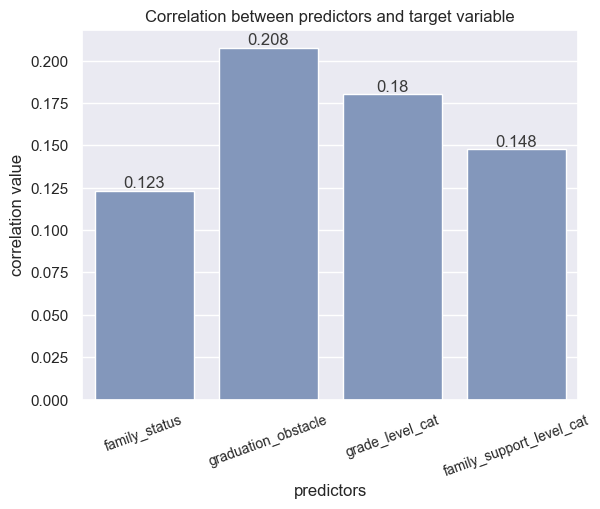

<Figure size 640x480 with 0 Axes>

In [103]:
plt.figure()
plt.xticks(rotation=20, fontsize=10)
sns.set_theme(style="darkgrid")
ax = sns.barplot(stats_df, x="var", y="corr", color="#7A95C4")
plt.figure()
ax.set(title="Correlation between predictors and target variable", ylabel="correlation value", xlabel="predictors")
ax.bar_label(container=ax.containers[0], labels=round(stats_df['corr'], 3), color="#3b3b3b")